In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser 
import missingno as msno

from sklearn.compose import ColumnTransformer 
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#library for classification prediction

##linear model
from sklearn.linear_model import LogisticRegression

##Linear and Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

#Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Gaussian Processes
from sklearn.naive_bayes import GaussianNB

#Ensemble methods
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#Neural Network
from sklearn.neural_network import MLPClassifier

#feature importance
from xgboost import plot_importance

#library for evaluating the models
from sklearn.metrics import average_precision_score,balanced_accuracy_score, auc,confusion_matrix, cohen_kappa_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, KFold

In [2]:
dataset = pd.read_csv(r"C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\BimaProject\AI\Directing Customers to Subs\Dataset\appdata10.csv")

In [3]:
target = dataset['enrolled']

In [4]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [6]:
if dataset['hour'].dtypes == 'O':
    print('ok')
else:
    print('none')

ok


In [7]:
class feature_engineering(BaseEstimator):
    
    def __init__(self):
        pass
    
    def fit(self, documents, y=None):
        return self
    
    def transform(self, x_dataset):
        top_screens = ['Loan2', 'location', 'Institutions', 'Credit3Container',
                       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
                       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
                       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
                       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
                       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
                       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
                       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
                       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
                       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
                       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
                       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
                       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
                       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker']
        savings_screen = ["Saving1","Saving2","Saving2Amount","Saving4","Saving5","Saving6",
                          "Saving7","Saving8","Saving9","Saving10"]
        cc_screens = ["CC1","CC1Category","CC3"]
        loans_screens = ["Loan","Loan2","Loan3","Loan4"]
        
        try:
            
            x_dataset['hour'] = x_dataset.hour.str.slice(0,3).astype(int)
            x_dataset["first_open"] = [parser.parse(row_data) for row_data in x_dataset["first_open"]]
            x_dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in x_dataset["enrolled_date"]]
        
        except:
            pass
    
        x_dataset["screen_list"] = x_dataset.screen_list.astype(str)+','
        
        for sc in top_screens:
            x_dataset[sc] = x_dataset.screen_list.str.contains(sc).astype(int)
            x_dataset["screen_list"] = x_dataset.screen_list.replace(sc+","," ")
            
        x_dataset["other"] = x_dataset.screen_list.str.count(",")
        x_dataset["SavingCount"] = x_dataset[savings_screen].sum(axis=1)
        x_dataset = x_dataset.drop(columns= savings_screen)
        x_dataset["CCCount"] = x_dataset[cc_screens].sum(axis=1)
        x_dataset = x_dataset.drop(columns= cc_screens)
        x_dataset["LoansCount"] = x_dataset[loans_screens].sum(axis=1)
        x_dataset = x_dataset.drop(columns= loans_screens)
        
        return x_dataset

In [8]:
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('scale_data', StandardScaler(),['dayofweek', 'hour', 'age', 'numscreens', 
                                                                               'minigame','used_premium_feature', 'liked', 
                                                                               'location', 'Institutions',
                                                                               'Credit3Container', 'VerifyPhone', 
                                                                               'BankVerification','VerifyDateOfBirth', 
                                                                               'ProfilePage', 'VerifyCountry', 'Cycle',
                                                                               'idscreen', 'Credit3Dashboard', 'Splash', 
                                                                               'RewardsContainer', 'Credit3','Credit1', 
                                                                               'EditProfile', 'Credit2', 'Finances', 
                                                                               'Alerts', 'Leaderboard', 'VerifyMobile', 
                                                                               'VerifyHousing', 'ProfileMaritalStatus',
                                                                               'ProfileEducation', 'AccountView', 
                                                                               'VerifyIncomeType', 'Login','WebView', 
                                                                               'ResendToken', 'TransactionList', 
                                                                               'ListPicker', 'other','SavingCount', 
                                                                               'LoansCount', 'SecurityModal','CCCount',
                                                                               'NetworkFailure','RewardDetail','VerifyHousingAmount',
                                                                               'ProfileChildren ','ProfileEducationMajor',
                                                                               'Rewards','VerifyAnnualIncome',
                                                                               'ProfileJobTitle','ProfileEmploymentLength']),
                                              ('drop_columns', 'drop', ['enrolled','enrolled_date','first_open','user',
                                                                        'SecurityModal','CCCount','NetworkFailure',
                                                                        'RewardDetail','VerifyHousingAmount',
                                                                        'ProfileChildren ','ProfileEducationMajor',
                                                                        'Rewards','VerifyAnnualIncome',
                                                                        'ProfileJobTitle','ProfileEmploymentLength',
                                                                        'screen_list'])])

In [9]:
model_pipeline = Pipeline(steps=[('feature_engineering', feature_engineering()),
                                 ('pre_processing', pre_process),
                                 ('random_forest', RandomForestClassifier(n_estimators=100, 
                                                                          bootstrap = True,
                                                                          max_features = 'sqrt'))
                                ])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(dataset,target,
                                                   test_size=0.3,
                                                   random_state=0)

In [33]:
X_train.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
17967,189295,2013-06-06 02:57:10.265,3,02:00:00,27,"idscreen,Home,ScanPreview,location,VerifyDateO...",65,0,0,1,2013-06-06 02:58:17.018,1
32391,52616,2013-05-14 15:36:53.311,1,15:00:00,20,"Splash,idscreen,Cycle,product_review,Home,Loan...",20,0,0,0,NaN,0
9341,208274,2013-01-15 17:55:01.248,1,17:00:00,31,"Institutions,Loan2,Credit3Container,CommunityA...",17,0,0,1,2013-01-26 21:34:07.267,0
7929,65017,2013-05-09 20:25:50.400,3,20:00:00,27,"Splash,idscreen,Cycle,product_review,Home,Scan...",10,0,0,1,2013-05-29 12:03:27.380,0
46544,34862,2013-06-10 20:05:25.378,0,20:00:00,29,"idscreen,Home,Loan3,product_review,product_rev...",7,1,0,1,2013-06-11 05:52:21.761,0


In [34]:
X_test.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
11841,239786,2013-05-20 01:57:31.444,0,01:00:00,41,"Splash,idscreen,Cycle,product_review,product_r...",34,0,0,1,2013-05-20 02:07:28.070,1
19602,279644,2013-04-27 06:20:30.158,5,06:00:00,26,"Home,Loan2,product_review,product_review,produ...",30,0,0,1,2013-04-27 06:26:08.778,0
45519,98290,2013-07-01 15:15:54.428,0,15:00:00,37,"idscreen,Cycle,Home,Alerts,Credit3,Loan3,produ...",11,0,1,0,NaN,0
25747,170150,2013-02-23 19:38:58.818,5,19:00:00,21,"idscreen,joinscreen,Cycle,product_review,produ...",13,0,0,1,2013-02-23 19:41:27.228,1
42642,237568,2013-06-15 01:02:45.222,5,01:00:00,30,"Home,CC1,CC1Category,Rewards,ProfilePage,Profi...",32,0,0,1,2013-06-15 01:14:51.309,0


In [13]:
# fit the pipeline with the training data
model_pipeline.fit(X_train,y_train)

C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Pipeline(memory=None,
         steps=[('feature_engineering', feature_engineering()),
                ('pre_processing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale_data',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['dayofweek', 'hour', 'age',
                                                   'numscreens', 'minigame',
                                                   'used_premium_feature',
                                                   'l...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                           

In [14]:
# predict target values on the training data
model_pipeline.predict(X_test)

C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [15]:
# predict target values on the training data
model_pipeline.predict_proba(X_test)

C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

array([[0.06, 0.94],
       [0.07, 0.93],
       [0.74, 0.26],
       ...,
       [0.47, 0.53],
       [0.24, 0.76],
       [0.43, 0.57]])

In [16]:
def evaluate_model_testing(model,fitur_train, y_train, fitur_test, y_test):
    #test
    predY = model.predict(fitur_test)
    probs = model.predict_proba(fitur_test)
    probs = probs[:, 1]
    #train
    probs_train = model.predict_proba(fitur_train)
    probs_train = probs_train[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    #classification report
    print(classification_report(y_test, predY))
    
    print("Accuracy on testing :" + str(accuracy_score(y_test, predY)))
    print("AUC of Precision-Recall Curve on Testing :" + str(auc(recall, precision)))
    print("AUC of ROC on Probability :" + str(roc_auc_score(y_test,probs)))
    print("AUC of ROC on Train:" + str(roc_auc_score(y_train,probs_train)))
    print("Precision Score :" + str(precision_score(y_test, predY, average='weighted')))
    print("F1 Score :" + str(f1_score(y_test, predY, average='weighted')))
    print("Recall Score :" + str(recall_score(y_test, predY, average='weighted')))
    
    #TN EAR EDRu
    (tn, fp, fn, tp ) = confusion_matrix(y_test, predY).ravel()
    print("TN :" + str(tn), "\t""FP :" + str(fp), "\t""FN :" + str(fn), "\t""TP :" + str(tp))
    print("EAR "+str((fp+tp)/(fp+tp+tn+fn)))
    print("EDR "+str((fp)/(fp+tp)))
    
    #confusion matrix plot
    conf_mat = confusion_matrix(y_test, predY)
    fig, ax = plt.subplots(figsize=(8,8))
    sn.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

              precision    recall  f1-score   support

           0       0.74      0.61      0.67      5669
           1       0.79      0.87      0.83      9331

    accuracy                           0.77     15000
   macro avg       0.76      0.74      0.75     15000
weighted avg       0.77      0.77      0.77     15000

Accuracy on testing :0.7723333333333333
AUC of Precision-Recall Curve on Testing :0.8995938159163871
AUC of ROC on Probability :0.8441338247017969
AUC of ROC on Train:0.9965994332408394
Precision Score :0.7694301827464337
F1 Score :0.766866194746286
Recall Score :0.7723333333333333
TN :3443 	FP :2226 	FN :1189 	TP :8142
EAR 0.6912
EDR 0.21469907407407407


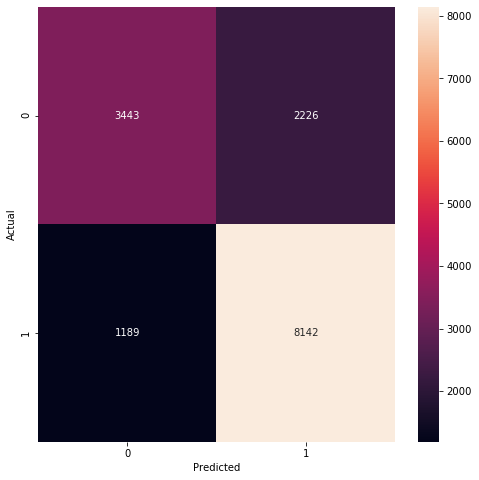

In [17]:
evaluate_model_testing(model_pipeline,X_train, y_train, X_test, y_test)

In [18]:
#exporting model to pickle
import pickle

pickling_on = open(r"full_pipeline_rfc.pkl","wb")
pickle.dump(model_pipeline, pickling_on)
pickling_on.close()
pipeline_rfc = pickle.load(open(r"full_pipeline_rfc.pkl", 'rb'))

In [19]:
def get_ai_grade(prob):
    d = dict()
    if prob <= 20:
        grade = 'E'
        description = 'Very Low Probabilty Will be Enrolled'
    elif prob <= 40:
        grade = 'D'
        description = 'Low Probabilty Will be Enrolled'
    elif prob <= 60:
        grade = 'C'
        description = 'Average Probabilty Will be Enrolled'
    elif prob <= 80:
        grade = 'B'
        description = 'High Probabilty Will be Enrolled'
    else:
        grade = 'A'
        description = 'Very High Probabilty Will be Enrolled'
    d['grade'] = grade
    d['description'] = description
    return d

In [35]:
prob_default = pipeline_rfc.predict_proba(X_test) [0,1]
grade = get_ai_grade(prob_default*100)

C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [36]:
out_dict = dict()
out_dict['prob_default'] = round((float(prob_default))*100, 3)
out_dict['Grade'] = grade

In [37]:
out_dict

{'prob_default': 94.0,
 'Grade': {'grade': 'A',
  'description': 'Very High Probabilty Will be Enrolled'}}

In [40]:
X_test.iloc[0].to_dict()

{'user': 239786,
 'first_open': '2013-05-20 01:57:31.444',
 'dayofweek': 0,
 'hour': ' 01:00:00',
 'age': 41,
 'screen_list': 'Splash,idscreen,Cycle,product_review,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,BankVerification',
 'numscreens': 34,
 'minigame': 0,
 'used_premium_feature': 0,
 'enrolled': 1,
 'enrolled_date': '2013-05-20 02:07:28.070',
 'liked': 1}

In [ ]:
X_test.columns

In [41]:
proba_train = pipeline_rfc.predict_proba(X_train)
proba_test = pipeline_rfc.predict_proba(X_test)

C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

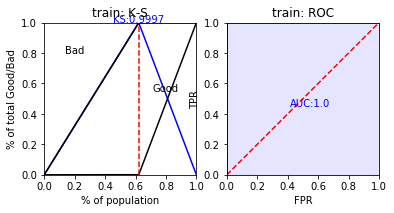

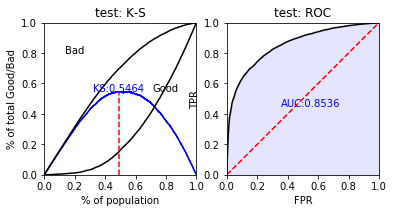

In [44]:
import scorecardpy as sc
train_perf = sc.perf_eva(y_train.values, proba_train[:,1], title = "train")
test_perf = sc.perf_eva(y_test.values, proba_test[:,1], title = "test")

In [43]:
y_train

17967    1
32391    0
9341     1
7929     1
46544    1
        ..
21243    0
45891    0
42613    0
43567    1
2732     1
Name: enrolled, Length: 35000, dtype: int64